In [85]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


c:\users\aaron\appdata\local\enthought\canopy\user\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [86]:
import pylab
import seaborn as sns

import nengolib
import nengo
from nengo.utils.numpy import rms, rmse

import numpy as np

In [87]:
T = 0.5
dt = 0.0001
tau = 0.01
n_neurons = 512

freqs = np.linspace(5, 100, 25)
nrmses = np.empty((len(freqs), 5))
amplitudes = np.empty_like(nrmses)

for i, freq in enumerate(freqs):
    for j in range(errors.shape[1]):

        with nengolib.Network() as model:

            u = nengo.Node(output=lambda t: 0.8*np.sin(2*np.pi*freq*t))  # integral of cos

            x = nengo.Ensemble(n_neurons, 1)

            nengo.Connection(u, x, synapse=None)  # represent the integral

            p_u = nengo.Probe(u, synapse=tau)
            p_x = nengo.Probe(x, synapse=tau)

        with nengo.Simulator(model, dt=dt, progress_bar=False) as sim:
            sim.run(T, progress_bar=False)

        nrmses[i, j] = rmse(sim.data[p_x], sim.data[p_u]) / rms(sim.data[p_u])
        amplitudes[i, j] = rms(sim.data[p_x]) / rms(sim.data[p_u])
    print freq

5.0
8.95833333333
12.9166666667
16.875
20.8333333333
24.7916666667
28.75
32.7083333333
36.6666666667
40.625
44.5833333333
48.5416666667
52.5
56.4583333333
60.4166666667
64.375
68.3333333333
72.2916666667
76.25
80.2083333333
84.1666666667
88.125
92.0833333333
96.0416666667
100.0


0.0147745343252 0.0154077127412


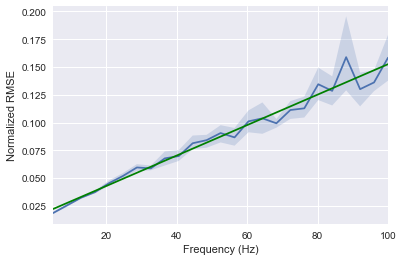

In [88]:
from numpy.linalg import lstsq

s = 2*np.pi*freqs
m, b = lstsq(np.asarray([s, np.ones_like(freqs)]).T,
             np.mean(nrmses, axis=1))[0]
eta = np.sqrt(m)
print eta, b

figure()
sns.tsplot(nrmses.T, freqs, err_style='ci_band', ci=95)
pylab.plot(freqs, eta**2 * s + b, c='g')
xlabel("Frequency (Hz)")
ylabel("Normalized RMSE")
show()

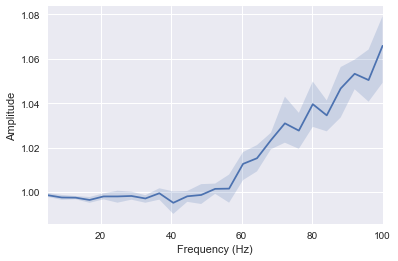

In [89]:
figure()
sns.tsplot(amplitudes.T, freqs, err_style='ci_band', ci=95)
xlabel("Frequency (Hz)")
ylabel("Amplitude")
show()